In [1]:
import numpy as np
import gspa
import scanpy, phate

2024-06-17 17:53:02.924034: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-17 17:53:02.925743: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 17:53:02.960350: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 17:53:02.961276: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 17:53:03.605873: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [12]:
import graphtools
print('graphtools', graphtools.__version__)
import tensorflow
print('tensorflow', tensorflow.__version__)
import keras
print('keras', keras.__version__)
import numpy as np
print ('numpy', np.__version__)
import sklearn
print ('sklearn', sklearn.__version__)
import scipy
print ('scipy', scipy.__version__)
import tqdm
print ('tqdm', tqdm.__version__)
import scanpy
print ('scanpy', scanpy.__version__)
import phate
print ('phate', phate.__version__)

graphtools 1.5.3
tensorflow 2.13.0
keras 2.13.1
numpy 1.22.4
sklearn 1.3.2
scipy 1.10.1
tqdm 4.66.4
scanpy 1.9.3
phate 1.0.11


In [2]:
data = np.load(f'data/example.npz')

In [3]:
adata = scanpy.AnnData(data['counts'], obs={'pseudotime': data['pseudotime']}, dtype=np.float64)
scanpy.pp.highly_variable_genes(adata)

# gene_adata stores genes as observations and cells as variables
gene_adata = adata[:, adata.var['highly_variable']].copy().T

In [4]:
gspa_op = gspa.GSPA(verbose=False)
gspa_op.construct_graph(adata.to_df())
gspa_op.build_diffusion_operator()
gspa_op.build_wavelet_dictionary()

2024-06-17 17:53:16.410180: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


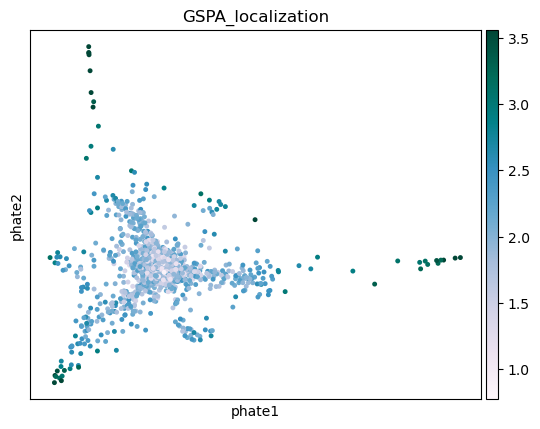

In [5]:
gene_adata.obsm['X_AE'], gene_adata.obsm['X_PC'] = gspa_op.get_gene_embeddings(gene_adata.to_df())
gene_adata.obs['GSPA_localization'] = gspa_op.calculate_localization()
gene_adata.obsm['X_phate'] = phate.PHATE(verbose=False, random_state=42).fit_transform(gene_adata.obsm['X_AE'])
scanpy.external.pl.phate(gene_adata, color=['GSPA_localization'], cmap='PuBuGn', sort_order=False,
                      vmax=np.percentile(gene_adata.obs['GSPA_localization'], 99.5))